数据集：
股票(30支股票，以天计数)
https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231


based：
https://www.tensorflow.org/tutorials/structured_data/time_series#multi-step_models

In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

数据分析阶段

In [3]:
# 数据集导入
df = pd.read_csv("stock/AABA_2006-01-01_to_2018-01-01.csv")
df.head()


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
date_time = pd.to_datetime(df.pop('Date'))

In [5]:
df.head()

,Open,High,Low,Close,Volume,Name
0,39.69,41.22,38.79,40.91,24232729,AABA
1,41.22,41.90,40.77,40.97,20553479,AABA
2,40.93,41.73,40.85,41.53,12829610,AABA
3,42.88,43.57,42.80,43.21,29422828,AABA
4,43.10,43.66,42.82,43.42,16268338,AABA


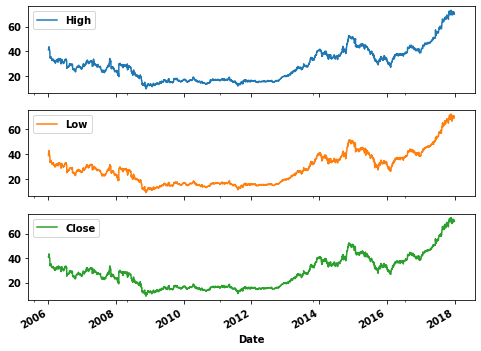

In [6]:
# 可视化原始数据
plot_cols = ['High', 'Low', 'Close']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plot_features = df[plot_cols][:1000]

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,3019.0,2.842648e+01,1.325724e+01,9.10,1.617500e+01,27.18,3.665500e+01,7.302000e+01
High,3019.0,2.876653e+01,1.335669e+01,9.48,1.638500e+01,27.49,3.703500e+01,7.325000e+01
Low,3019.0,2.806656e+01,1.315733e+01,8.94,1.597000e+01,26.82,3.630500e+01,7.246000e+01
Close,3019.0,2.841273e+01,1.325816e+01,8.95,1.613000e+01,27.10,3.663500e+01,7.293000e+01
Volume,3019.0,2.158391e+07,1.926231e+07,1939061.00,1.248025e+07,17321301.00,2.512757e+07,4.382317e+08


In [8]:
df.isnull().sum()


Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

特征工程-
1. 查找开门价和最高价
2. 时间

Text(0, 0.5, 'high price')

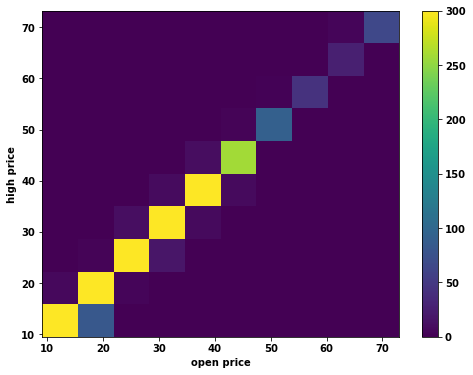

In [9]:
plt.hist2d(df['Open'],df['High'],bins=(10,10),vmax=300)
plt.colorbar()
plt.xlabel("open price")
plt.ylabel("high price")

In [10]:
# 将开门价和最高价格转换为矢量
# open = df["Open"].copy()
open = df.pop("Open")
max_open = open.max()



# 转换为弧度
high_rad = df.pop("High")*np.pi/180
# high_rad = df['High'].copy()
# high_rada =high_rad*np.pi/180

# 计算开门价的x，y分量
df['Ox'] = open * np.cos(high_rad)
df["Oy"] = open*np.sin(high_rad)

# 计算最大开门价的x，y分量
df['max Ox'] = max_open*np.cos(high_rad)
df['max Oy'] = max_open*np.sin(high_rad)

In [11]:
df.head()

,Low,Close,Volume,Name,Ox,Oy,max Ox,max Oy
0,38.79,40.91,24232729,AABA,29.854220,26.153807,54.924544,48.116680
1,40.77,40.97,20553479,AABA,30.680522,27.528058,54.349629,48.765133
2,40.85,41.53,12829610,AABA,30.545640,27.243876,54.494079,48.603660
3,42.80,43.21,29422828,AABA,31.067968,29.554623,52.905388,50.328325
4,42.82,43.42,16268338,AABA,31.180665,29.755271,52.826268,50.411366


(8.961474619265152, 32.14825803110977, 1.5284467835246605, 69.92186076596755)

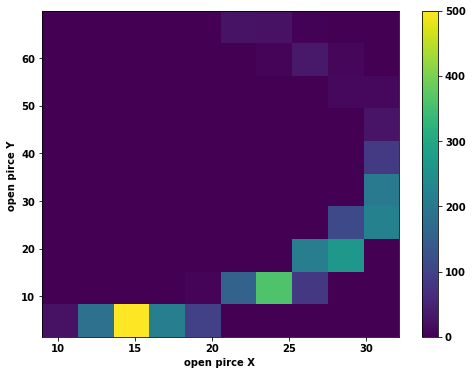

In [12]:
plt.hist2d(df['Ox'], df['Oy'], bins=(10, 10),vmax=500)
plt.colorbar()
plt.xlabel('open pirce X ')
plt.ylabel('open pirce Y ')
ax = plt.gca()
ax.axis('tight')

2022-09-05 16:53:47.143760: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


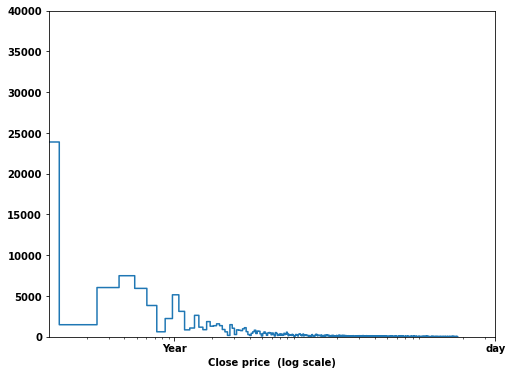

In [13]:
# 傅立叶算法提取特征
fft = tf.signal.rfft(df['Close'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['Close'])
#每一年中的每一天数据
day_per_year = 365
# 每一年的数据
years_per_dataset = n_samples_h/(day_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim([0.1, max(plt.xlim())])

plt.xticks([1, 365.2524], labels=['Year', 'day'])
_ = plt.xlabel('Close price  (log scale)')

In [14]:
df.head()

,Low,Close,Volume,Name,Ox,Oy,max Ox,max Oy
0,38.79,40.91,24232729,AABA,29.854220,26.153807,54.924544,48.116680
1,40.77,40.97,20553479,AABA,30.680522,27.528058,54.349629,48.765133
2,40.85,41.53,12829610,AABA,30.545640,27.243876,54.494079,48.603660
3,42.80,43.21,29422828,AABA,31.067968,29.554623,52.905388,50.328325
4,42.82,43.42,16268338,AABA,31.180665,29.755271,52.826268,50.411366


拆分数据,将对(70%, 20%, 10%)训练、验证和测试集使用拆分

In [46]:
# 数据集导入
df = pd.read_csv("stock/AABA_2006-01-01_to_2018-01-01.csv")
date_time = pd.to_datetime(df.pop('Date'))
df.head()


,Open,High,Low,Close,Volume,Name
0,39.69,41.22,38.79,40.91,24232729,AABA
1,41.22,41.90,40.77,40.97,20553479,AABA
2,40.93,41.73,40.85,41.53,12829610,AABA
3,42.88,43.57,42.80,43.21,29422828,AABA
4,43.10,43.66,42.82,43.42,16268338,AABA


In [47]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
# 训练集，验证集和测试集
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]
# 特征
num_features = df.shape[1]
num_features

6

In [48]:
train_df.head()

,Open,High,Low,Close,Volume,Name
0,39.69,41.22,38.79,40.91,24232729,AABA
1,41.22,41.90,40.77,40.97,20553479,AABA
2,40.93,41.73,40.85,41.53,12829610,AABA
3,42.88,43.57,42.80,43.21,29422828,AABA
4,43.10,43.66,42.82,43.42,16268338,AABA


规范化数据

In [49]:
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df-train_mean)/train_std

In [50]:
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

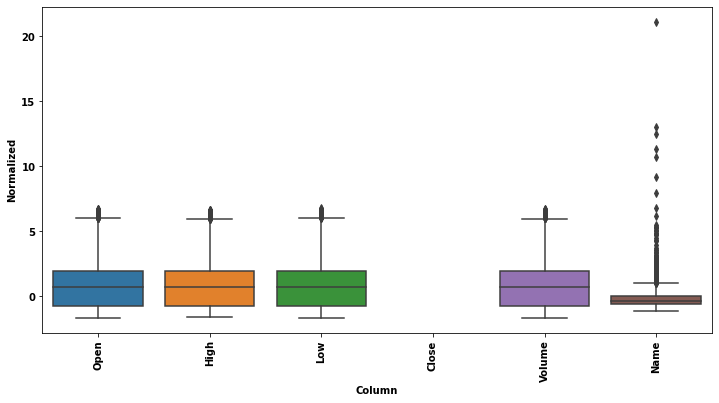

In [51]:
# 查看特征分布
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)